In [2]:
import json
import os
from collections import defaultdict

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [3]:
data_dir = "/workspace/svd_subspace/outputs/flan-t5-base/glue_text_generation/"
moe_data = defaultdict(list)
for gate_k in [4, 8, 16, 32]:
    for k in [16, 32, 64, 128]:
        file_name = f"gate_k={gate_k}_k={k}.json"
        file_name = os.path.join(data_dir, file_name)
        if not os.path.exists(file_name):
            # print(f"File {file_name} does not exist")
            continue
        with open(file_name) as f:
            data = json.load(f)
        moe_data["num_params"].append(data["model_info"]["all_params"])
        moe_data["gate_k"].append(gate_k)
        moe_data["k"].append(k)
        scores = {}
        for key in data:
            if key == "model_info":
                continue
            scores[key] = (
                data[key]["accuracy"]
                if "accuracy" in data[key]
                else data[key]["spearman_rho"]
            )
        average_accuracy = np.mean(list(scores.values())) * 100
        for key in scores:
            moe_data[key].append(scores[key])
        moe_data["average"].append(average_accuracy)
moe_data = pd.DataFrame(moe_data)

# 使用 Styler 对象并应用背景颜色渐变
styled_df = moe_data.style.background_gradient(cmap="RdYlGn")

# 显示结果
styled_df

,num_params,gate_k,k,cola,mnli,mrpc,qnli,qqp,rte,sst2,stsb,average
0,312368384,4,16,0.720038,0.841671,0.843137,0.912868,0.846846,0.841155,0.933486,0.870168,85.117129
1,370842880,4,32,0.724832,0.842180,0.840686,0.913784,0.847588,0.837545,0.932339,0.870828,85.122299
2,487791872,4,64,0.727709,0.842486,0.838235,0.913784,0.848133,0.837545,0.933486,0.871877,85.165678
3,721689856,4,128,0.728667,0.842486,0.843137,0.914150,0.848429,0.841155,0.933486,0.871944,85.293188
4,318684416,8,16,0.723873,0.841773,0.850490,0.911404,0.847514,0.844765,0.934633,0.870978,85.317882
5,377158912,8,32,0.731544,0.842282,0.850490,0.913051,0.848800,0.848375,0.934633,0.873389,85.532067
6,494107904,8,64,0.733461,0.842690,0.848039,0.913784,0.849542,0.844765,0.934633,0.874408,85.516534
7,728005888,8,128,0.733461,0.842792,0.845588,0.914516,0.849790,0.848375,0.935780,0.875088,85.567374
8,331316480,16,16,0.724832,0.838411,0.843137,0.911587,0.847885,0.844765,0.934633,0.870852,85.201282
9,389790976,16,32,0.731544,0.839735,0.845588,0.913967,0.848776,0.841155,0.934633,0.872569,85.349581


/tmp/ipykernel_762769/96687780.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Dense' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  plot_data.loc[plot_data["k"] == -1, "k"] = "Dense"
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


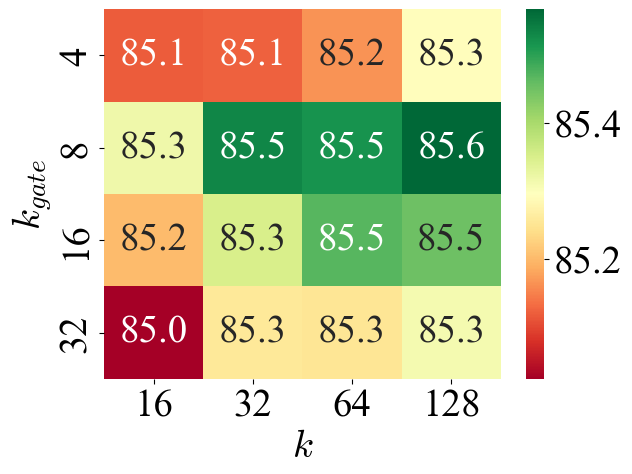

/tmp/ipykernel_762769/96687780.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Dense' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  plot_data.loc[plot_data["k"] == -1, "k"] = "Dense"
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


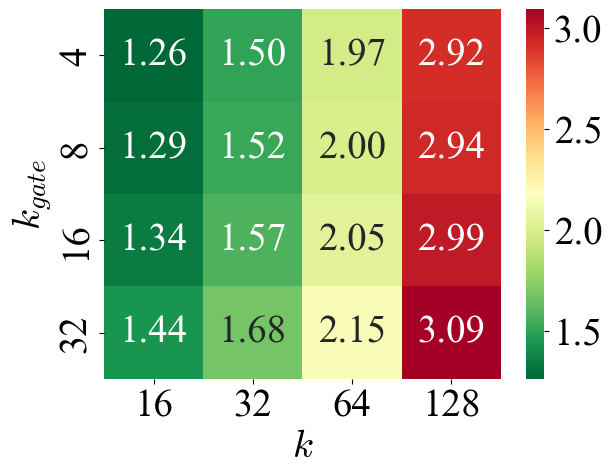

In [10]:
matplotlib.rcParams["font.size"] = 28

plot_data = moe_data.copy()
plot_data["method"] = "Ours"
plot_data.loc[plot_data["k"] == -1, "k"] = "Dense"
pivot_data = (
    plot_data[["gate_k", "k", "average"]]
    .pivot(index="gate_k", columns="k", values="average")
    .copy()
)

sns.heatmap(data=pivot_data, annot=True, fmt=".1f", cmap="RdYlGn")
plt.xlabel("$k$")
plt.ylabel("$k_{gate}$")
plt.savefig("flan-t5-base_hp-acc.pdf", bbox_inches="tight")
plt.show()

plot_data = moe_data.copy()
plot_data["method"] = "Ours"
plot_data.loc[plot_data["k"] == -1, "k"] = "Dense"
plot_data["num_params"] = plot_data["num_params"] / 247577856
pivot_data = (
    plot_data[["gate_k", "k", "num_params"]]
    .pivot(index="gate_k", columns="k", values="num_params")
    .copy()
)

sns.heatmap(data=pivot_data, annot=True, fmt=".2f", cmap="RdYlGn_r")
plt.xlabel("$k$")
plt.ylabel("$k_{gate}$")
plt.savefig("flan-t5-base_hp-params.pdf", bbox_inches="tight")
plt.show()